## PROJECT: “Analysis of Global Sales for Video Games”

### GOAL: 
The goal of this project is to gain exploratory and descriptive insight about
global sales in Video games Market. Also to be able to predict the sales using year, platform and Genre. 

### Github: 
https://github.com/rediChrisEze/ReDi-DS-autumn-2020-final-project.git

### PROJECT AGENDA:

 - Data preparation and Cleaning
    
 - Data exploration
    
 - Descriptive Statistics
    
 - Relationships and Correlation analysis
    
 - Linear Regression modelling
    
 - Summary and Conclusion


### EXPECTED PROJECT OUTCOME:

- categorization of sales in the different regions based on Year,Genre,Platform, Publisher ,

- Summary and comparison of descriptive statistics: mean, median, mode, etc

- Relation between the sales in the different regions

- Market prediction in terms of volume sales.

### SOURCE AND DESCRIPTION OF DATASET

All information about the description of the dataset stated below have been copied from the Source: https://www.kaggle.com/gregorut/videogamesales

### Description of Dataset:

This dataset contains a list of video games with sales greater than 100,000 copies.

### Fields includes:

- Rank - Ranking of overall sales

- Name - The games name

- Platform - Platform of the games release (i.e. PC,PS4, etc.)

- Year - Year of the game's release

- Genre - Genre of the game

- Publisher - Publisher of the game

- NA_Sales - Sales in North America (in millions)

- EU_Sales - Sales in Europe (in millions)

- JP_Sales - Sales in Japan (in millions)

- Other_Sales - Sales in the rest of the world (in millions)

- Global_Sales - Total worldwide sales.


## To begin the analysis of the data, the following python libraries would be imported


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### First step is to import the dataset into jupyter notebook using the pd.read_csv method of the pandas library. 
### The dataframe is saved in a variable called 'df'

In [2]:
df = pd.read_csv('vgsales.csv')

### To have a feel of the dataset, the first 5 observations are displayed using the head method


In [3]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### To get a summary information about the columns,data types etc, the info method is applied to the dataframe.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Below is a summary of some important information about the data using the .format function

In [5]:
name_vidgame = df['Name'].nunique()
types_vidgame = df['Genre'].nunique()
platform_vidgame = df['Platform'].nunique()
publisher_vidgame = df['Publisher'].nunique()
print("There are about {} unique games which are classified unter {} different Genre.\nThere are {} platforms via which Game publishers can publish.\nThere are {} publisher in mentioned in this dataset.".format(name_vidgame,types_vidgame,platform_vidgame,publisher_vidgame))

There are about 11493 unique games which are classified unter 12 different Genre.
There are 31 platforms via which Game publishers can publish.
There are 578 publisher in mentioned in this dataset.


## Exploratory Analysis

#### Yearly Sales based on Region.

<AxesSubplot:xlabel='Year'>

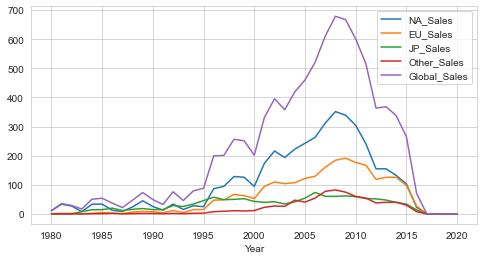

In [70]:
yearly_sales = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum()
yearly_sales.plot(figsize=(8,4))

#### Sales in the different  Genre based on Region.

In [10]:
genre_sales = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values('Global_Sales',ascending=False)
genre_sales.head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Action,877.83,525.00,159.95,187.38,1751.18
Sports,683.35,376.85,135.37,134.97,1330.93
Shooter,582.60,313.27,38.28,102.69,1037.37
Role-Playing,327.28,188.06,352.31,59.61,927.37
Platform,447.05,201.63,130.77,51.59,831.37
Misc,410.24,215.98,107.76,75.32,809.96
Racing,359.42,238.39,56.69,77.27,732.04
Fighting,223.59,101.32,87.35,36.68,448.91
Simulation,183.31,113.38,63.70,31.52,392.20


<AxesSubplot:xlabel='Genre'>

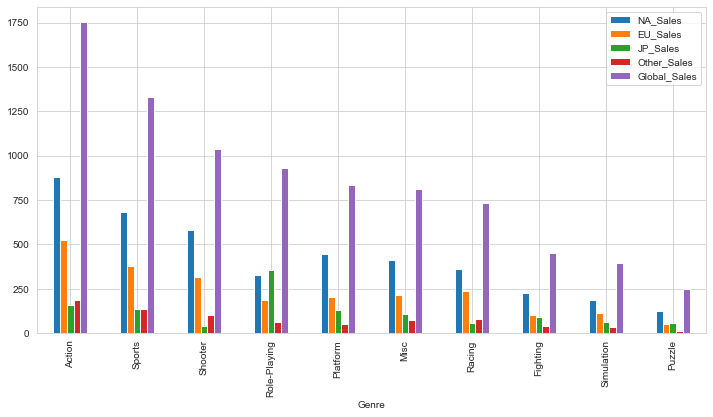

In [62]:
genre_sales.head(10).plot(kind='bar',figsize=(12,6))

#### Sales in the different  Platform based on Region.

In [12]:
platform_sales = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values('Global_Sales',ascending=False)
platform_sales[platform_sales['Global_Sales']>100].head(10)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


#### Sales in the different  Platform based on region[Global].

<AxesSubplot:ylabel='Global_Sales'>

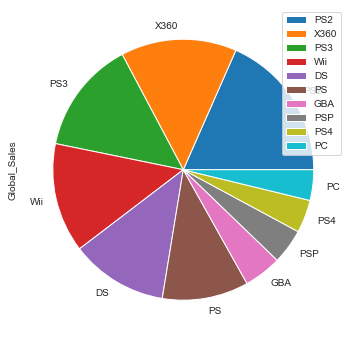

In [16]:
platform_sales[platform_sales['Global_Sales']>100].head(10).plot(kind='pie',y='Global_Sales',figsize=(12,6))

#### Sales in the different  Platform based on region[North America].

<AxesSubplot:ylabel='NA_Sales'>

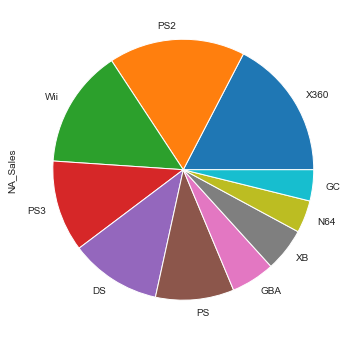

In [20]:
platform_sales_NA = df.groupby('Platform')['NA_Sales'].sum().sort_values(ascending=False)
platform_sales_NA.head(10).plot(kind='pie',y='NA_Sales',figsize=(12,6))

#### Sales in the different  Platform based on region[Europe].

<AxesSubplot:ylabel='EU_Sales'>

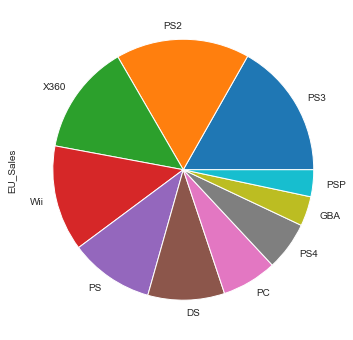

In [21]:
platform_sales_EU = df.groupby('Platform')['EU_Sales'].sum().sort_values(ascending=False)
platform_sales_EU.head(10).plot(kind='pie',y='EU_Sales',figsize=(12,6))

#### Sales by Publisher based on Region.

<AxesSubplot:xlabel='Publisher'>

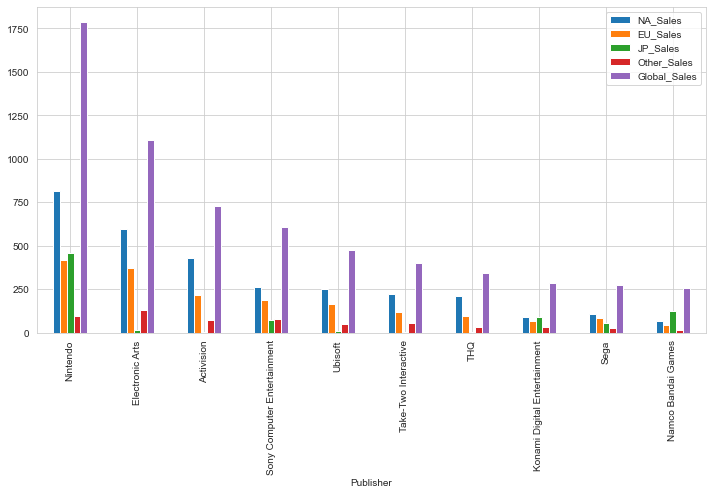

In [23]:
publisher_sales = df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].sum().sort_values('Global_Sales',ascending=False)
publisher_sales[publisher_sales['Global_Sales']>100].head(10).plot(kind='bar',figsize=(12,6))

## EXAMING AVERAGES AND COMPARING THEM

#### Average sales in the different  regions based on Years.

<AxesSubplot:xlabel='Year'>

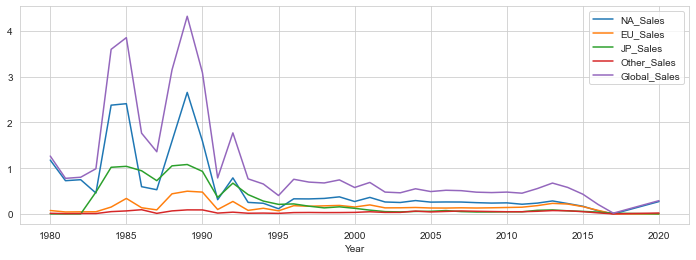

In [43]:
yearly_sales_avg = df.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].mean()
yearly_sales_avg.plot(figsize=(12,4))

#### Average sales in the different  regions based on Genre.

In [42]:
genre_sales_avg = df.groupby('Genre')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].mean()
genre_sales_avg_NA = genre_sales_avg['NA_Sales'].sort_values(ascending=False).head(1)
genre_sales_avg_EU = genre_sales_avg['EU_Sales'].sort_values(ascending=False).head(1)
genre_sales_avg_JP = genre_sales_avg['JP_Sales'].sort_values(ascending=False).head(1)
print(genre_sales_avg_NA,genre_sales_avg_EU,genre_sales_avg_JP)

Genre
Platform    0.504571
Name: NA_Sales, dtype: float64 Genre
Shooter    0.239137
Name: EU_Sales, dtype: float64 Genre
Role-Playing    0.236767
Name: JP_Sales, dtype: float64


#### Average sales in the different  regions based on Platform.

In [37]:
platform_sales_avg = df.groupby('Platform')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']].mean()
platform_sales_avg_NA = platform_sales_avg['NA_Sales'].sort_values(ascending=False).head(1)
platform_sales_avg_EU = platform_sales_avg['EU_Sales'].sort_values(ascending=False).head(1)
platform_sales_avg_JP = platform_sales_avg['JP_Sales'].sort_values(ascending=False).head(1)
print(platform_sales_avg_NA,platform_sales_avg_EU,platform_sales_avg_JP)

Platform
NES    1.285102
Name: NA_Sales, dtype: float64 Platform
GB    0.487959
Name: EU_Sales, dtype: float64 Platform
NES    1.006633
Name: JP_Sales, dtype: float64


#### Average sales in the different  regions based on Platform.

<AxesSubplot:ylabel='Publisher'>

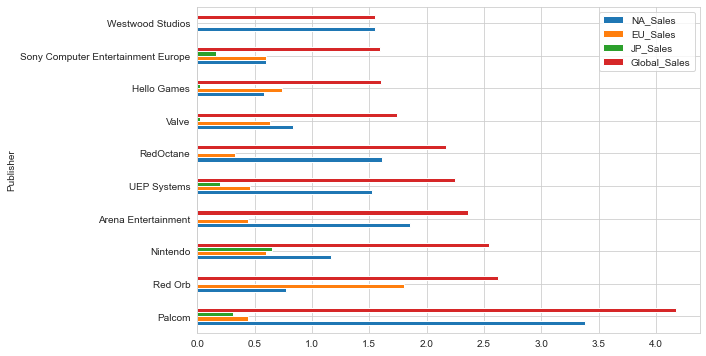

In [68]:
publisher_sales_avg = df.groupby('Publisher')[['NA_Sales','EU_Sales','JP_Sales','Global_Sales']].mean().sort_values('Global_Sales',ascending=False)
publisher_sales_avg.head(10).plot(kind='barh',figsize=(9,6))

##  Relationships and Correlation analysis


In [54]:
df2 = df[['Rank','Year','Global_Sales']]
df['Platform'] = df['Platform'].astype('category')
df['Genre'] = df['Genre'].astype('category')
df['Publisher'] = df['Publisher'].astype('category')

In [55]:
df2['platform_categ'] = df['Platform'].cat.codes
df2['Genre_categ'] = df['Genre'].cat.codes
df2['Publisher_categ'] = df['Publisher'].cat.codes

<ipython-input-55-60fb00443ab0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['platform_categ'] = df['Platform'].cat.codes
<ipython-input-55-60fb00443ab0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Genre_categ'] = df['Genre'].cat.codes
<ipython-input-55-60fb00443ab0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [56]:
df2.head(5)

,Rank,Year,Global_Sales,platform_categ,Genre_categ,Publisher_categ
0,1,2006.0,82.74,26,10,359
1,2,1985.0,40.24,11,4,359
2,3,2008.0,35.82,26,6,359
3,4,2009.0,33.00,26,10,359
4,5,1996.0,31.37,5,7,359


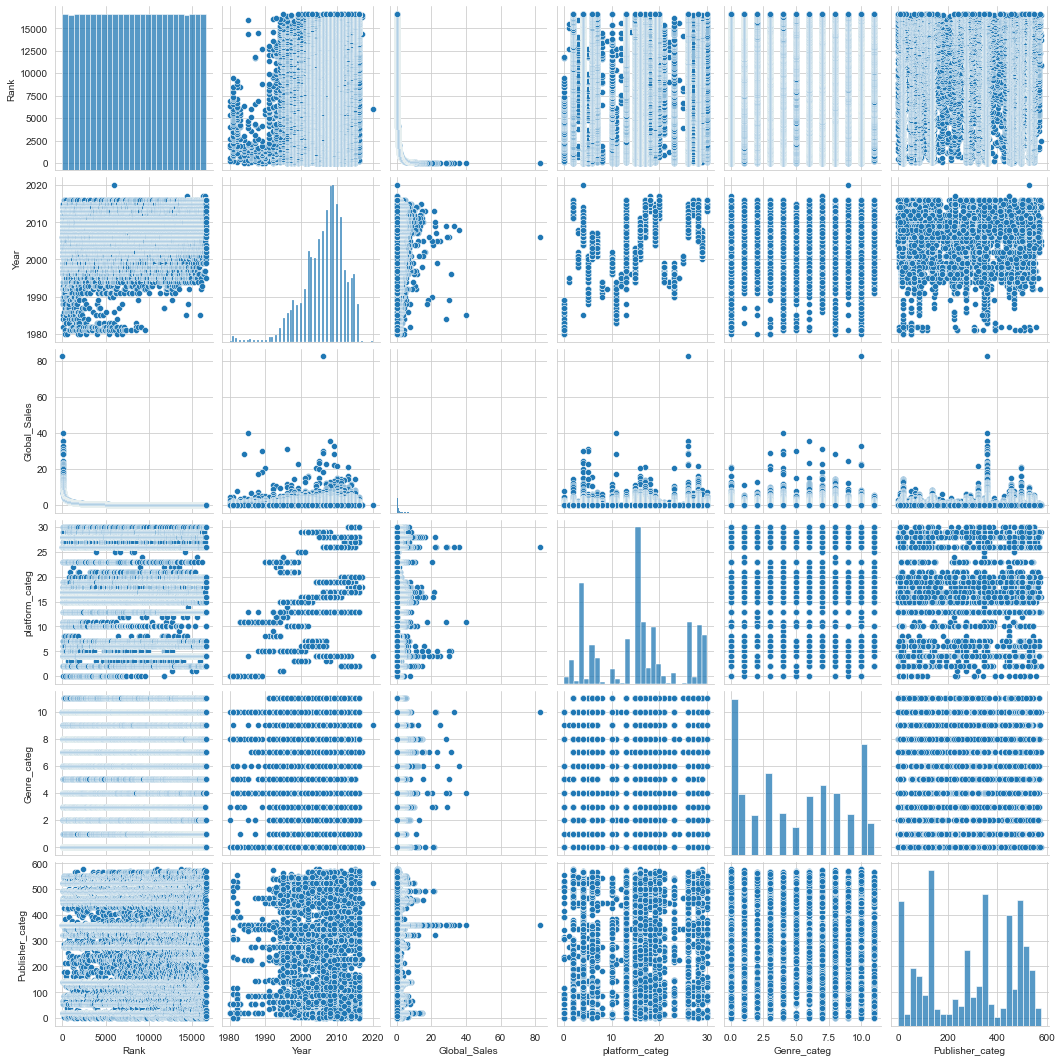

In [57]:
sns.pairplot(df2)

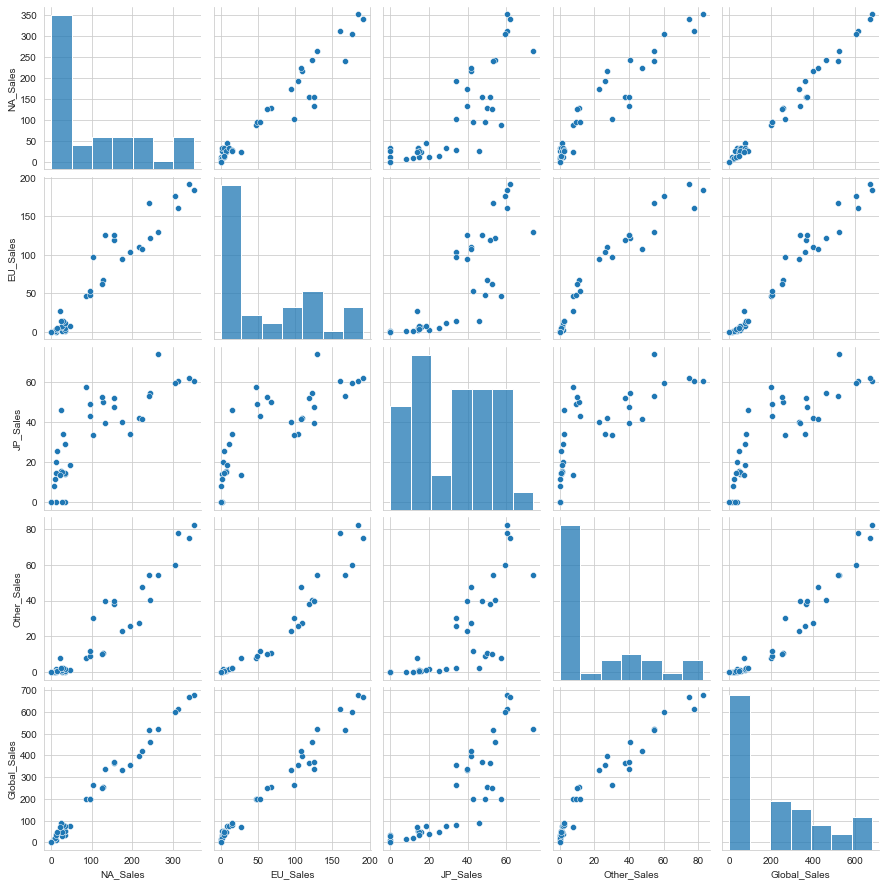

In [15]:
sns.pairplot(yearly_sales)

<AxesSubplot:>

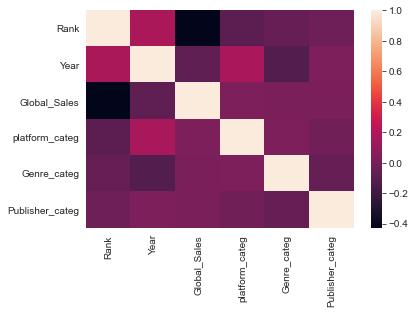

In [58]:
sns.heatmap(df2.corr())

<AxesSubplot:>

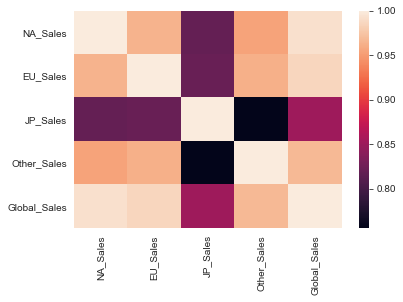

In [16]:
sns.heatmap(yearly_sales.corr())

## Conclusion

- Based on the yearly sales, the period between 2005 and 2010 was a peak sales period for the video game market. After 2015 there has been a big drop in the sales volume.
- Globally the Genre 'Action' is the most sold over the years.
- Based on platform, PS2 has more sales volume globally but in North America X360 had more sales while in Europe, PS3 and PS2 have  similar pattern interms of sales volume.
- Globally the biggest game publisher is Nintendo
- The average sale over the years has been on the decline after the period between 1980 and 1990.
- In North America the highest sale volume for Genre is 'Platform' with about 0.5046~ while Japan is 'Role playing' with 0.2368~ and Europe is 'Shooter' with 0.2391
- The highest average sale based on Platform form for the different regions are: 
 - North America: NES(1.285~)
 - Europe: GB (0.4880~)
 - Japan:  NES (1.007~)
- Based on Publishers, the software company 'Palcom' had the highest global sales volume over the years
- Based on the result of the pair plot with the different variables,there were no meaningful relationships or correlations to drive the building of a predictive model/regression model